(240, 480)


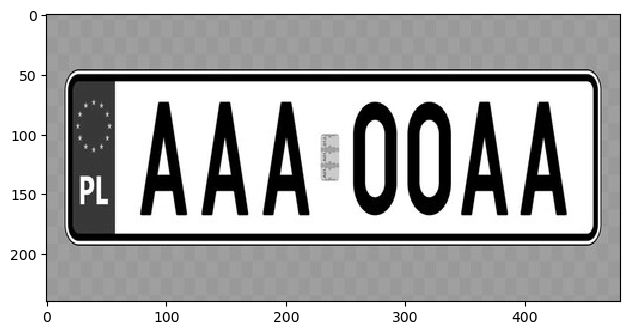

In [1]:
#importing required libraries
from sklearn import svm
from PIL import Image
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img1 = imread('numplate1.jpg' , as_gray=True)
imshow(img1)
print(img1.shape)


(240, 480)


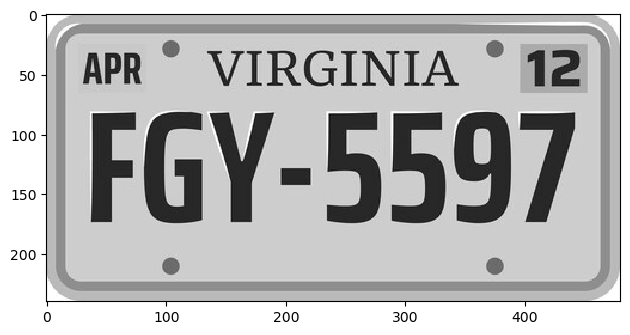

In [2]:
#reading the image
img2 = imread('numplate2.jpg' , as_gray=True)
imshow(img2)
print(img2.shape)


In [3]:
#creating hog features 
fd1, hog_image1 = hog(img1, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)
print(hog_image1)
print(hog_image1.shape)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14984\1230075597.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd1, hog_image1 = hog(img1, orientations=9, pixels_per_cell=(8, 8),


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00027403 0.         0.        ]
 [0.         0.0003393  0.         ... 0.         0.00031244 0.        ]
 ...
 [0.         0.00017331 0.         ... 0.         0.00042595 0.        ]
 [0.         0.         0.         ... 0.00013701 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(240, 480)


In [4]:
#creating hog features 
fd2, hog_image2 = hog(img2, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)
print(hog_image2)
print(hog_image2.shape)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14984\3510342369.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd2, hog_image2 = hog(img2, orientations=9, pixels_per_cell=(8, 8),


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(240, 480)


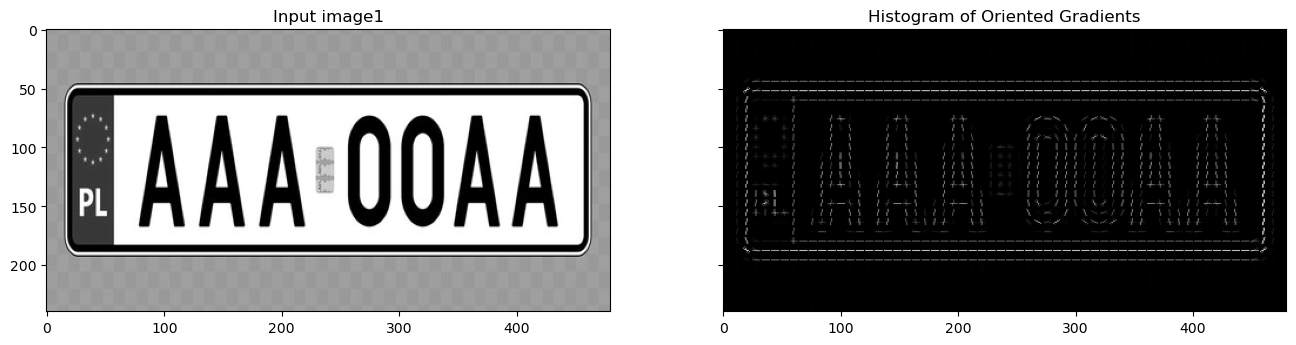

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(img1, cmap=plt.cm.gray) 
ax1.set_title('Input image1') 

ax2.imshow(hog_image1, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()


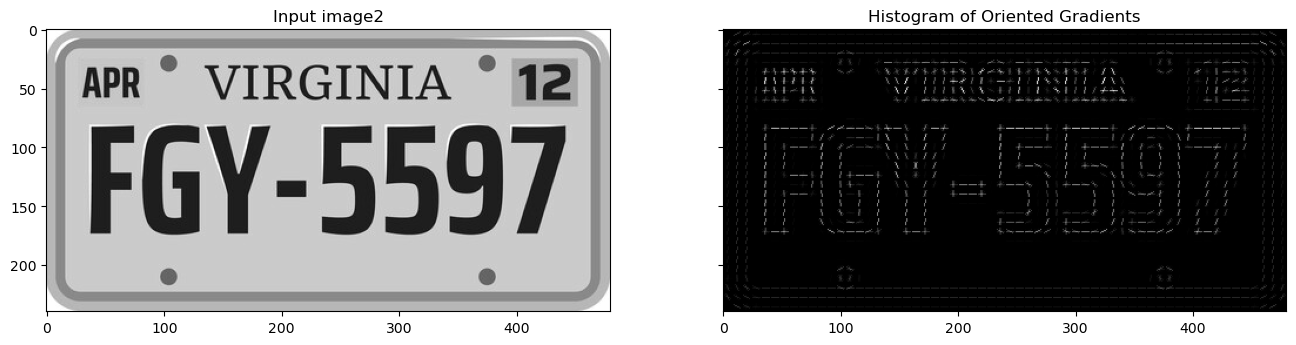

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(img2, cmap=plt.cm.gray) 
ax1.set_title('Input image2') 

ax2.imshow(hog_image2, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [7]:
 def main():
   
    # Convert the images into vectors
    vector1 = convert_to_vector(hog_image1)
    vector2 = convert_to_vector(hog_image2)
    
    # Calculate the cosine similarity
    cosine_similarity = calculate_cosine_similarity(vector1, vector2)
    
    # Output the result
    print("Cosine similarity:", cosine_similarity)
    
def convert_to_vector(img):
    # Convert the image into a numpy array
    img_array = np.array(img)
    
    # Reshape the array into a 1D vector
    vector = img_array.reshape(-1)
    
    #convert the values to floats between 0 and 1
    vector = vector.astype('float32')/255.0
    
    return vector
    
def calculate_cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    cosine_similarity = dot_product / (norm1 * norm2)
    return cosine_similarity

if __name__ == "__main__":
    main()


Cosine similarity: 0.20927691


In [ ]:
import cv2
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from skimage.feature import hog
from scipy.spatial.distance import cosine
from sklearn import svm
from PIL import Image


# Define the sliding window function
def sliding_window(image, step_size, window_size):
    """
    Slide a window across the image and return the window location and content.
    """
    for y in range(0, image.shape[0] - window_size[1], step_size):
        for x in range(0, image.shape[1] - window_size[0], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])
            
            
# Define the convert to vector function
def convert_to_vector(arr):
    """
    Flatten a multi-dimensional array into a one-dimensional vector.
    """
    return arr.flatten()   
     

# Load the image A and extract its HOG features
image_a = cv2.imread('numplate6.jpg', 0)

#resizing image 
resized_image_a = resize(image_a, (100,150)) 


hog_features_a = hog(resized_image_a, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3))

# Load the image B
image_b = cv2.imread('numplate5.jpg', 0)


# Initialize variables to store the maximum similarity and best location
max_sim = 0
best_loc = None

# Define the sliding window parameters
window_size = (100, 100)
step_size = 1

# Slide the window across the image B and detect the presence of image A
for (x, y, sub_image) in sliding_window(image_b, step_size, window_size):
    
    #resizing sub_image 
    resized_sub_image = resize(sub_image, (100,150)) 

    
    # Extract the HOG features of the sub-image
    hog_features_b = hog(resized_sub_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3))

    
    # Compute the cosine similarity between the HOG features of image A and the sub-image
    sim = 1 - cosine(hog_features_a, hog_features_b)

    # Update the maximum similarity and best location if necessary
    if sim > max_sim:
        max_sim = sim
        best_loc = (x, y)
        
# Draw a rectangle around the detected location
cv2.rectangle(image_b, best_loc, (best_loc[0] + window_size[0], best_loc[1] + window_size[1]), (0, 255, 0), 2)
print(cv2.rectangle)

# Show the result
cv2.imshow('Result', image_b)
cv2.waitKey(0)
cv2.destroyAllWindows()        

<built-in function rectangle>
